# Clearwater-Riverine Station Demo

In [1]:
import unittest
import os
import sys
import matplotlib.pyplot as plt
import pandas
pandas.options.display.float_format = '{:,.2f}'.format

## Set paths to the src directories of Riverine and TSM

In [2]:
local_path = os.getcwd()
repo_path = os.path.dirname(os.path.dirname(local_path))
riverine_path = os.path.join(repo_path, 'riverine', 'src')
sys.path.append(riverine_path)
sys.path.append(local_path)

## Import Riverine modules

In [3]:
from riverine.stations import Station, WaterQualityStation, MetStation

ClearWater repo path: /Users/todd/GitHub/environmentalsystems/ClearWater
TSM source path: /Users/todd/GitHub/environmentalsystems/ClearWater/modules/python/src/TSM


## Create meteology station and read the data from Excel

In [4]:
# Create meteorology station
met_station = Station(39.0, -120.0, 0.0)

# Location of meteorology data
met_filename = 'Berlin_Reservoir_meteorology_2006.xlsx'
met_file_path = os.path.join(local_path, 'input_files', met_filename)

# Read data from Excel
date_column_name = 'Date'
variables = ['Tair', 'Tdew', 'Wind Speed', 'Wind Direction', 'Cloudiness', 'Solar Radiation']
units = ['degC', 'degC', 'm/s', 'rad', 'fraction', 'W/m2']
met_station.read_excel(met_file_path, sheet_name='Berlin_Reservoir_meteorology', parse_dates=[date_column_name], variables=variables, skiprows=2)

# Set the units for each data frame
met_station.set_units(variables, units)

## Create a constant time series for Air Pressure

In [5]:
met_station.make_constant_time_series('Air Pressure', 1013.0, units='mb', start='2006-01-01 00:00',
                                    end='2006-12-31 23:00', freq='1H')

## Interpolate all the variables to a specified date and time 

In [6]:
def interpolate(station: MetStation, variables: list, interpolation_date: str) -> pandas.DataFrame:
    interpolated_values = [met_station.interpolate_variable(variable, interpolation_date) for variable in variables]
    return pandas.DataFrame({'variables':variables, interpolation_date:interpolated_values})


In [7]:
df1 = interpolate(met_station, variables, '2006-01-01 01:30')
df1

,variables,2006-01-01 01:30
0,Tair,0.85
1,Tdew,-0.60
2,Wind Speed,3.60
3,Wind Direction,4.00
4,Cloudiness,10.00
5,Solar Radiation,0.00


In [8]:
df2 = interpolate(met_station, variables, '2006-01-15 12:05')
df2

,variables,2006-01-15 12:05
0,Tair,-2.07
1,Tdew,-8.30
2,Wind Speed,5.18
3,Wind Direction,5.42
4,Cloudiness,7.50
5,Solar Radiation,387.17


## Plot the data for all the variables

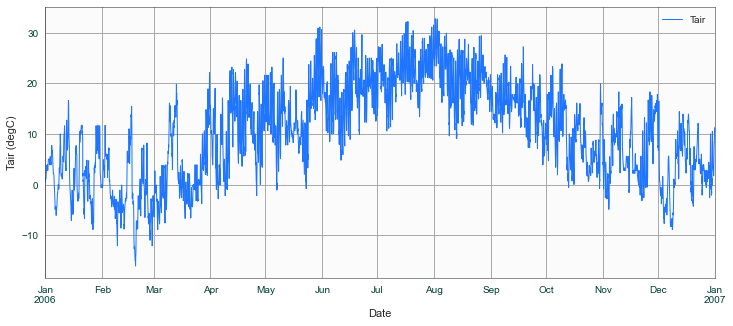

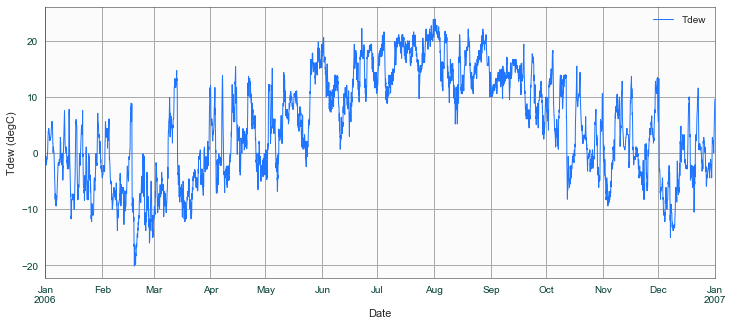

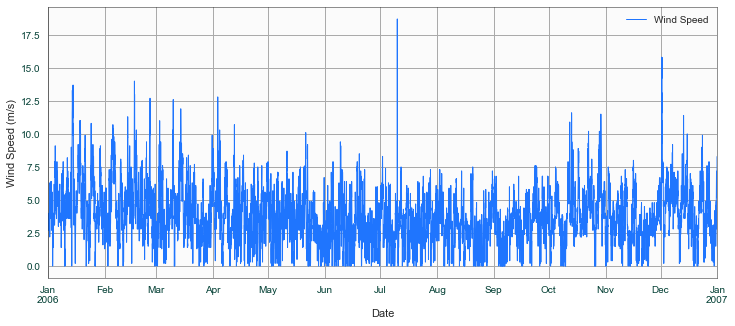

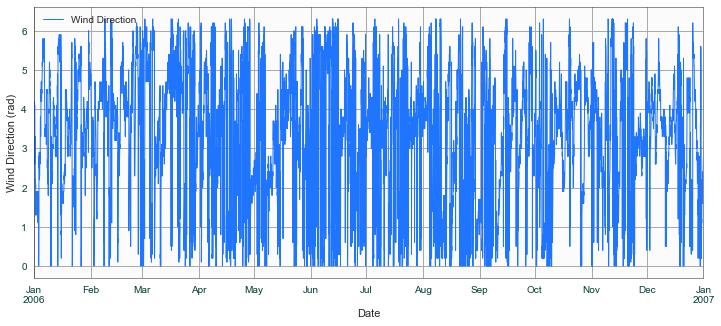

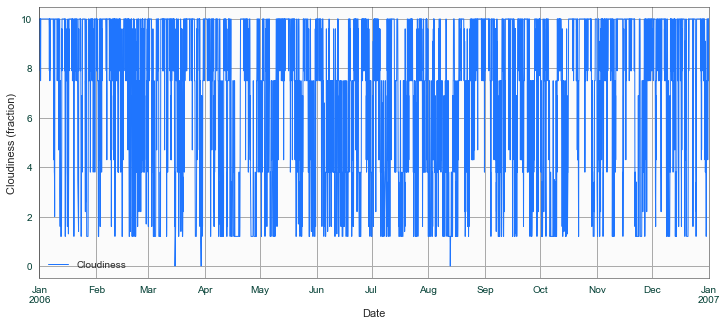

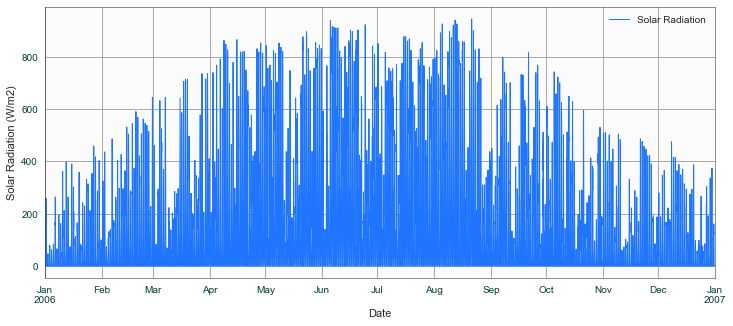

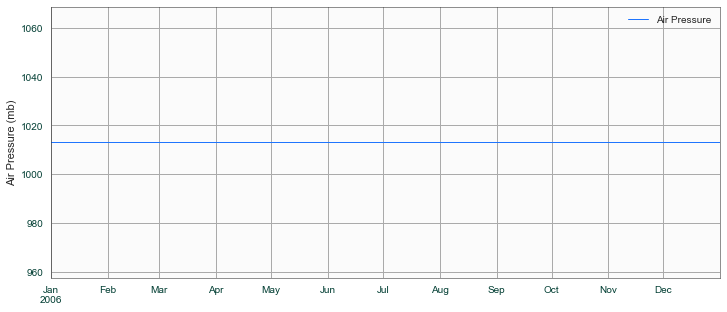

In [9]:
met_station.plot()